Physics 474 - Spring 2023

Lab 1 - Data Analysis; Making cuts,Fitting and confidence intervals with data<br>

Z-Boson Mass Peak and Width 

<font color='red'>Author: RJ Young
    


________________________________________________________________________________
Background:

(see presentation from Lecure on ELMS)

We will be looking at hypothetical data from a "collider detector" that measures particle energies and momentum coming from interactions of colliding beams in the detector centeral region. The  "event data" from this hypothetical experiment are measurements of the resulting electron and positron energies and momentum vectors in a particle detector, hopefully from the decay $Z \rightarrow e^+ \; e^-$. 

The data given here represent measurments of the energies that are NOT smeared by finite detector energy resolution (i.e. these are perfect energy measurments). In real life the reconstructed mass distribution would broadened, or smeared, by finite energy measurement resolution of the detector. To fit the data you would need to use a monte carlo simulation to smear the measured energies drawn from the Breit-wigner with some resolution function appropriate to your detector and then fit that smeared function to the reconstructed data. We will be picking this back up near the end of the semester! 


The goal of the Lab is to

- take those measured values from the detector data and reconstruct the distribution of the reconstructed invariant mass using the equation:

$m^2 = 2(E_1E_2-\vec{p}_1 \cdot \vec{p}_2)$ 

- fit the reconstructed mass data distribution to a Breit-Wigner distribution $\cal{M}_{bw}$

$\Large \cal{M}_{bw}(m;m_0,\Gamma) = \frac{1}{\pi} \frac{\Gamma/2}{(m-m_0)^2+(\Gamma/2)^2}$

to get the best-fit central mass ($m_0$) and width(FWHM) $(\Gamma)$ parameters  as well as the confidence intervals for the 2 parameters and the 2-D joint confidence region.


___________________________________________________________________
Part 1 (4 pts)

Look at the comma-separated-variable text file 'Z->e+e-_Data_500.csv' to see the format of the data described in the first few lines of the file.

You are asked to
- read in the data file 'Z->e+e-_Data_500.csv'. 
- make histogram distributions of the 4 variables for each particle (8 total)
- the distribution of the reconstruced inavriant mass
- print how many total events there are



Number of Events: 625
----------------


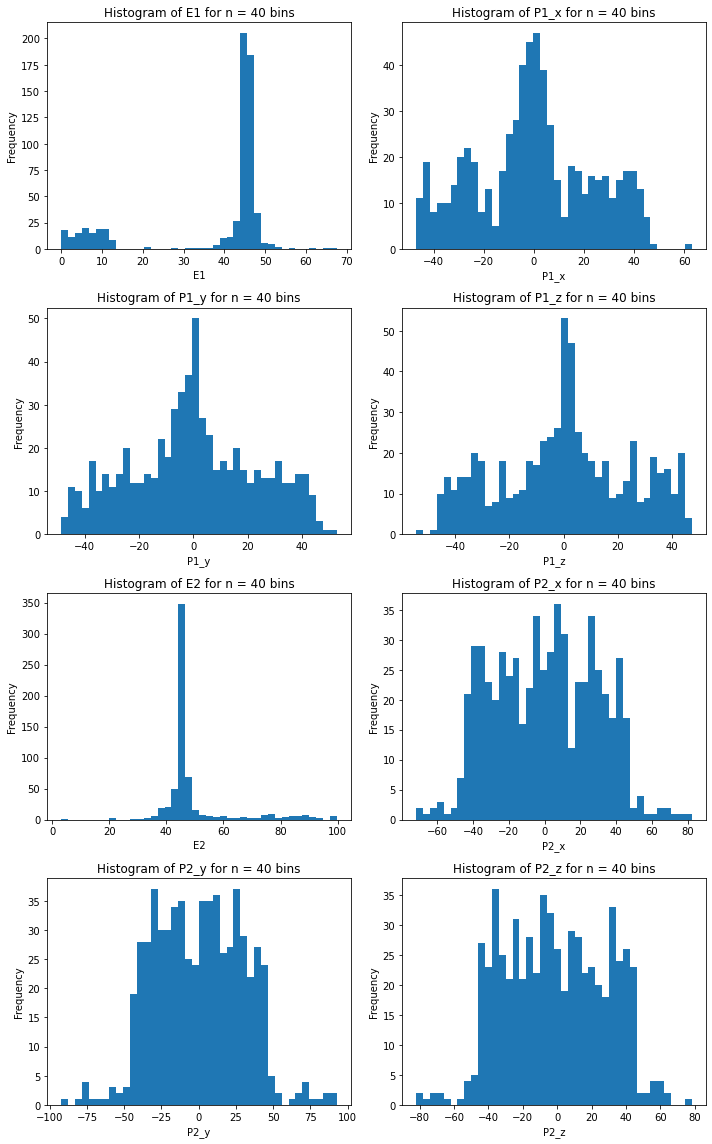

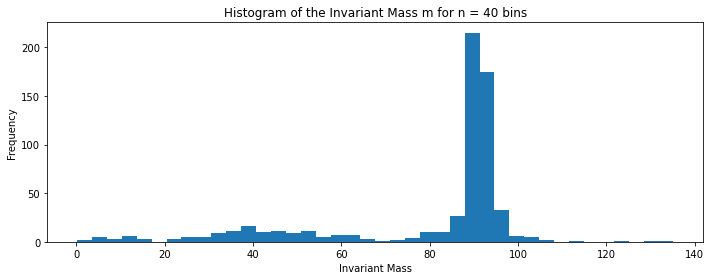

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.optimize import minimize

filename = 'Z->e+e-_Data_500.csv'
data = np.loadtxt(filename,delimiter=',')
n_bins = 40
E1 = data[:,0]
p1_x = data[:,1]
p1_y = data[:,2]
p1_z = data[:,3]
E2 = data[:,4]
p2_x = data[:,5]
p2_y = data[:,6]
p2_z = data[:,7]
m = np.sqrt(2*(E1*E2 - (p1_x*p2_x + p1_y*p2_y + p1_z*p2_z)))
N = np.size(E1)
print('Number of Events: ' + str(N))
print('----------------')

plt.figure(figsize=(10,16))
plt.subplot(4,2,1)
plt.hist(E1,n_bins)
plt.xlabel('E1')
plt.ylabel('Frequency')
plt.title('Histogram of E1 for n = 40 bins')

plt.subplot(4,2,2)
plt.hist(p1_x,n_bins)
plt.xlabel('P1_x')
plt.ylabel('Frequency')
plt.title('Histogram of P1_x for n = 40 bins')

plt.subplot(4,2,3)
plt.hist(p1_y,n_bins)
plt.xlabel('P1_y')
plt.ylabel('Frequency')
plt.title('Histogram of P1_y for n = 40 bins')

plt.subplot(4,2,4)
plt.hist(p1_z,n_bins)
plt.xlabel('P1_z')
plt.ylabel('Frequency')
plt.title('Histogram of P1_z for n = 40 bins')

plt.subplot(4,2,5)
plt.hist(E2,n_bins)
plt.xlabel('E2')
plt.ylabel('Frequency')
plt.title('Histogram of E2 for n = 40 bins')

plt.subplot(4,2,6)
plt.hist(p2_x,n_bins)
plt.xlabel('P2_x')
plt.ylabel('Frequency')
plt.title('Histogram of P2_x for n = 40 bins')

plt.subplot(4,2,7)
plt.hist(p2_y,n_bins)
plt.xlabel('P2_y')
plt.ylabel('Frequency')
plt.title('Histogram of P2_y for n = 40 bins')

plt.subplot(4,2,8)
plt.hist(p2_z,n_bins)
plt.xlabel('P2_z')
plt.ylabel('Frequency')
plt.title('Histogram of P2_z for n = 40 bins')
plt.tight_layout()
plt.show()


plt.figure(figsize = (10,4))
plt.hist(m,40)
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass m for n = 40 bins')
plt.tight_layout()
plt.show()

_______________________________________________________________
Part 2a (2 pt)

make the following plots
- side-by-side subplots with E1 and E2
- Scatter plot of E2 vs E1

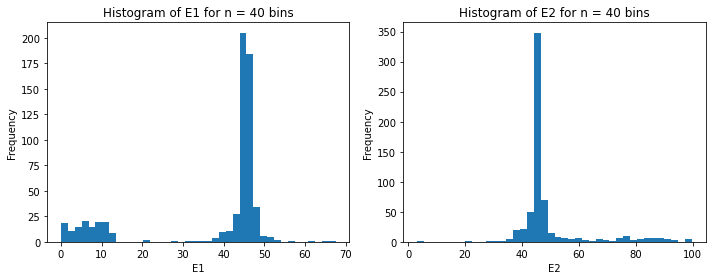

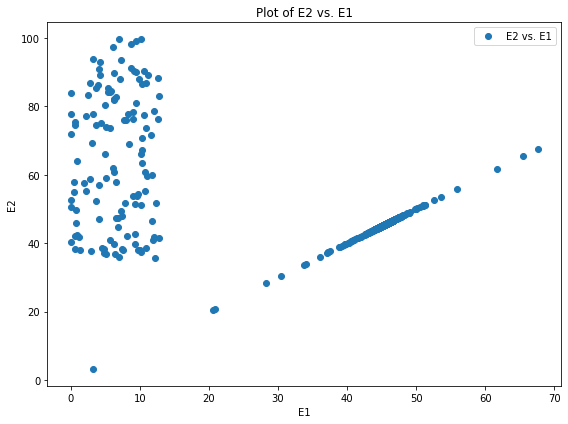

In [257]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.hist(E1,40)
plt.xlabel('E1')
plt.ylabel('Frequency')
plt.title('Histogram of E1 for n = 40 bins')

plt.subplot(1,2,2)
plt.hist(E2,40)
plt.xlabel('E2')
plt.ylabel('Frequency')
plt.title('Histogram of E2 for n = 40 bins')
plt.tight_layout()
plt.show()

plt.figure(figsize = (8,6))
plt.plot(E1,E2,'o',label='E2 vs. E1')
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Plot of E2 vs. E1')
plt.legend()
plt.tight_layout()
plt.show()

________________________________________________________________
Observations:


______________________________________________________________

_______________________________________________________________
Part 2b (2 pts)

- make appropriate cuts in the E2 vs E1 space to remove the "background" events
- plot the reconstructed invariant mass for the "signal" events on linear yscale and log yscale
- print the number of "signal" events

Number of signal events: 499
----------------


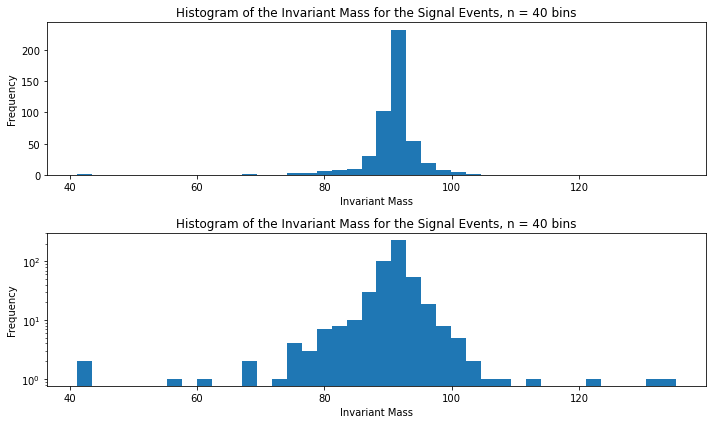

In [258]:
temp1 = np.zeros(N)
temp2 = np.zeros(N)
temp3x = np.zeros(N)
temp3y = np.zeros(N)
temp3z = np.zeros(N)
temp4x = np.zeros(N)
temp4y = np.zeros(N)
temp4z = np.zeros(N)
c = 0
for i in range(0,N):
    if E1[i] > 20 and E2[i] < 70:
        temp1[c] = E1[i]
        temp2[c] = E2[i]
        temp3x[c] = p1_x[i]
        temp3y[c] = p1_y[i]
        temp3z[c] = p1_z[i]
        temp4x[c] = p2_x[i]
        temp4y[c] = p2_y[i]
        temp4z[c] = p2_z[i]
        c = c+1
        
cut_E1 = np.delete(temp1,np.where(temp1==0))
cut_E2 = np.delete(temp2,np.where(temp2==0))
cut_p1x = np.delete(temp3x,np.where(temp3x==0))
cut_p1y = np.delete(temp3y,np.where(temp3y==0))
cut_p1z = np.delete(temp3z,np.where(temp3z==0))
cut_p2x = np.delete(temp4x,np.where(temp4x==0))
cut_p2y = np.delete(temp4y,np.where(temp4y==0))
cut_p2z = np.delete(temp4z,np.where(temp4z==0))

N_sig = np.size(cut_E1)
print('Number of signal events: ' + str(N_sig))
print('----------------')

m_sig = np.sort(np.sqrt(2*(cut_E1*cut_E2 - (cut_p1x*cut_p2x + cut_p1y*cut_p2y + cut_p1z*cut_p2z))))

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.hist(m_sig,40)
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass for the Signal Events, n = 40 bins')

plt.subplot(2,1,2)
plt.hist(m_sig,40)
plt.yscale('log')
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass for the Signal Events, n = 40 bins')
plt.tight_layout()
plt.show()

_______________________________________________________________
Part 2c (2 pts)

Using the signal events and the values 

$M_Z = 91.1876 \, Gev/c^2$ <br>
$\Gamma_Z = 2.4952 \, GeV/c^2$

- plot the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV 
- make the same plot for the data but with errorbars = $\sqrt{N}$ and the Breit-Wigner theory distribution normalized to the total numer of signal data events.
- print the number of "signal" data events total, signal data events from 80-100 GeV, signal theory events from 80-100 GeV


Total number of signal events: 499
Number of signal events between 80-100 GeV: 468
---------------


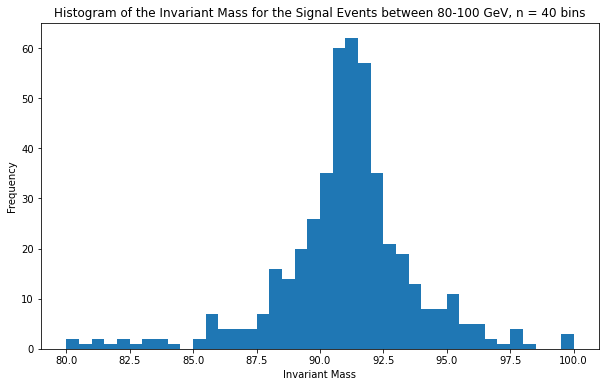

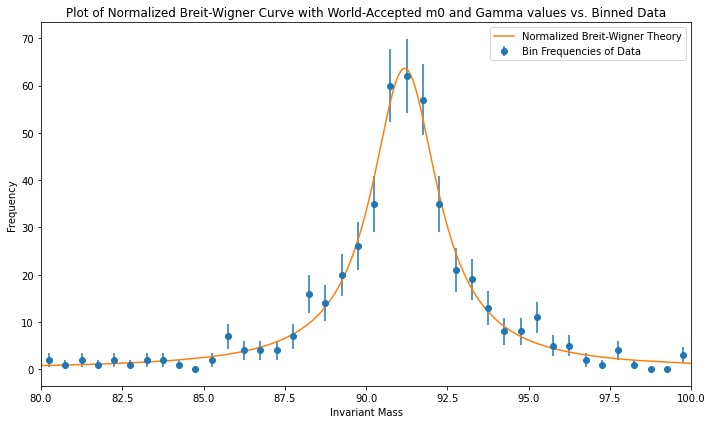

In [259]:
def BreitWigner(m,m0,gamma):
    return (1/np.pi)*(0.5*gamma/((m-m0)**2 + (0.5*gamma)**2))

sigfreq, bin_edges = np.histogram(m_sig,40,range=(80,100))
bin_center = 0.5*(bin_edges[:-1]+bin_edges[1:])
bin_width = bin_edges[1]-bin_edges[0]

m0 = 91.1876
gam = 2.4952
theory = N_sig*bin_width*BreitWigner(m_sig,m0,gam)
N_sig_within = np.count_nonzero((m_sig < 100) & (m_sig > 80))

print('Total number of signal events: ' + str(N_sig))
print('Number of signal events between 80-100 GeV: ' + str(N_sig_within))
print('---------------')

plt.figure(figsize = (10,6))
plt.hist(m_sig,40,range=(80,100))
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass for the Signal Events between 80-100 GeV, n = 40 bins')

plt.figure(figsize = (10,6))
plt.errorbar(bin_center,sigfreq,yerr = np.sqrt(sigfreq),fmt='o',label='Bin Frequencies of Data')
plt.plot(m_sig,theory,label='Normalized Breit-Wigner Theory')
plt.xlim((80,100))
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Plot of Normalized Breit-Wigner Curve with World-Accepted m0 and Gamma values vs. Binned Data')
plt.legend()
plt.tight_layout()
plt.show()

______________________________________________________________________
Part 3 (5 pts)

We are going to fit the signal events reconstructed invariant mass data to find the best-fit central mass $m_0$ and width $\Gamma$ in two ways
- binned $\chi^2$ 
- un-binned method of maximum likelihood (MML)

for the binned $\chi^2$ we will use
- binned data: 40 bins from 80-100 GeV
- theory = Breit-wigner normalized to the entire number of signal events (not the number from 80-100 GeV)
- we will use the integral approximation: predicted number in a bin = Thry(bin-center) * bin_width
- errors for each bin based on theory (i.e. $\sigma_i = \sqrt{N_{thry}}$)

for the MML method
- un-binned data 
- minimize the negative Log likelihood

you need to
- print the best-fit central mass and width for both fits
- plot the reconstructed invariant mass distribution for the "signal" data events in 40 bins from 80-100 GeV with errorbars = $\sqrt{N_{data}}$
- on same plot show the best-fit theory curve for both fits


Best fit Mass from Chi-Squared Fit: 91.19230385667623
Best fit Gamma from Chi-Squared Fit: 2.730642344620426
Best fit Mass from MML Fit: 91.17871793456196
Best fit Gamma from MML Fit: 2.4707906783062783
--------------------


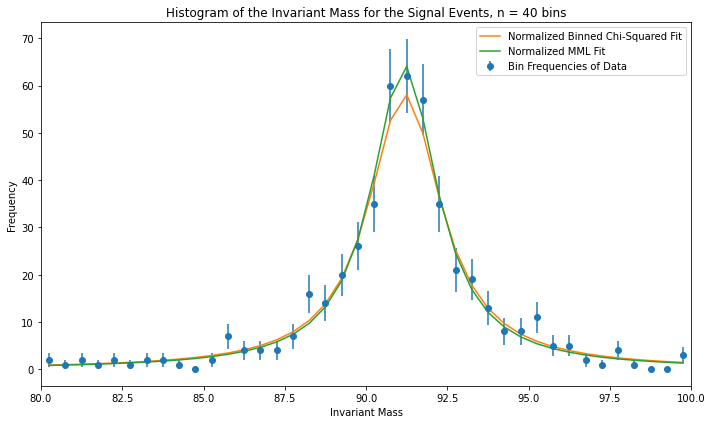

In [297]:
from scipy.optimize import minimize

def chisquared(parameters,xdata,ydata):
    m0 = parameters[0]
    gamma = parameters[1]
    thry = N_sig*bin_width*BreitWigner(xdata,m0,gamma)
    err = np.sqrt(thry)
    
    return np.sum((thry-ydata)**2/err**2)

def neglogL(parameters,data):
    m0 = parameters[0]
    gamma = parameters[1]
    thry = BreitWigner(data,m0,gamma)
    
    return -(np.log(thry)).sum()

thry = N_sig*bin_width*BreitWigner(bin_center,m0,gam)
err = np.sqrt(thry)

p0 = m0,gam
res1 = minimize(neglogL,p0,args=(m_sig))
m0_best_MML = res1.x[0]
gamma_best_MML = res1.x[1]
MMLfit = N_sig*bin_width*BreitWigner(bin_center,m0_best_MML,gamma_best_MML)

res2 = minimize(chisquared,p0,args=(bin_center,sigfreq))
m0_best_chi = res2.x[0]
gamma_best_chi = res2.x[1]
chifit = N_sig*bin_width*BreitWigner(bin_center,m0_best_chi,gamma_best_chi)

print('Best fit Mass from Chi-Squared Fit: ' + str(m0_best_chi))
print('Best fit Gamma from Chi-Squared Fit: ' + str(gamma_best_chi))
print('Best fit Mass from MML Fit: ' + str(m0_best_MML))
print('Best fit Gamma from MML Fit: ' + str(gamma_best_MML))
print('--------------------')

plt.figure(figsize = (10,6))
plt.errorbar(bin_center,sigfreq,yerr = np.sqrt(sigfreq),fmt='o',label='Bin Frequencies of Data')
plt.plot(bin_center,chifit,label='Normalized Binned Chi-Squared Fit')
plt.plot(bin_center,MMLfit,label = 'Normalized MML Fit')
plt.xlim((80,100))
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass for the Signal Events, n = 40 bins')
plt.legend()
plt.tight_layout()
plt.show()

_________________________________________________________________
Part 4 (2 pts)

Using the best-fit parameters from MML fit show
- plot of data distribution with errorbars in 40 bins from 80-100 GeV
- smooth plot of best-fit theory curve
- show best fit values on plot
- show reduced $\chi^2$ and $\chi^2$ probability on plot
- residual plot as subplot below the main plot


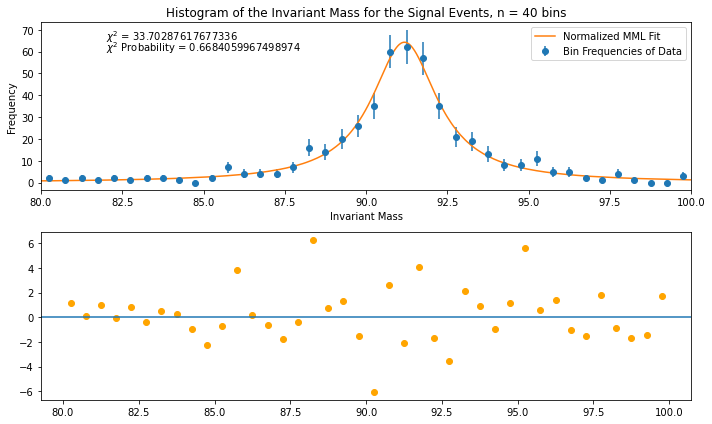

In [290]:
MMLplotfit = N_sig*bin_width*BreitWigner(m_sig,m0_best_MML,gamma_best_MML)
chi2 = np.sum((MMLfit-sigfreq)**2/MMLfit)
dof = np.size(bin_center) - 2
prob = st.chi2.sf(chi2,dof)

residuals = sigfreq - MMLfit

text1 = '$\chi^{2}$ = ' + str(chi2)
text2 = '$\chi^{2}$ Probability = ' + str(prob)

plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.errorbar(bin_center,sigfreq,yerr = np.sqrt(sigfreq),fmt='o',label='Bin Frequencies of Data')
plt.plot(m_sig,MMLplotfit,label = 'Normalized MML Fit')
plt.xlim((80,100))
plt.xlabel('Invariant Mass')
plt.ylabel('Frequency')
plt.title('Histogram of the Invariant Mass for the Signal Events, n = 40 bins')
plt.text(82, 65,text1)
plt.text(82, 60,text2)
plt.legend()

plt.subplot(2,1,2)
plt.plot(bin_center,residuals, 'o', color = 'orange')
plt.axhline(0)
plt.tight_layout()
plt.show()

_____________________________________________________________________________
Part 5a (5 pts)

calculate and show the $-2 \Delta log \cal{L}$

- calculate the $-2 \Delta log \cal{L}$
- show a 'contourf' in 500 levels for the $-2 \Delta log \cal{L}$
- show the 68% and 95% 2D joint confidenece regions on the plot
- show the best-fit point
- show the true value from part 2c above

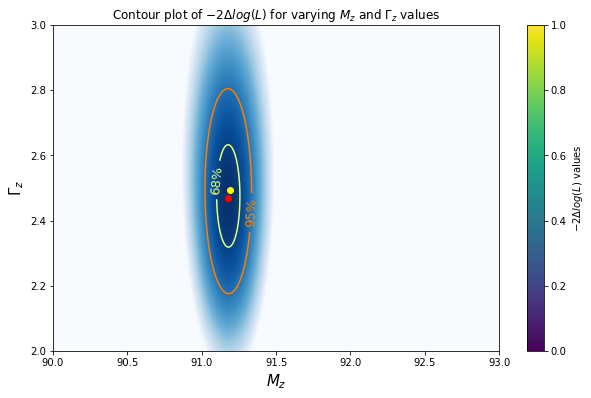

In [342]:
m_world = 91.1876
gamma_world = 2.4952

bins = 300
negLL = np.zeros((bins,bins))

m0s = np.linspace(90,93,bins)
gams = np.linspace(2,3,bins)
for i in range(bins):
    for j in range(bins):
        negLL[j,i] = neglogL((m0s[i],gams[j]),m_sig)

bestfitpar = m0_best_MML,gamma_best_MML
negLL_min = neglogL(bestfitpar,m_sig)
del_logL = 2*(negLL - negLL_min)
del_logL = np.minimum(del_logL, 16.*np.ones((bins,bins)))
DLLmin = del_logL.min()

M,G = np.meshgrid(m0s,gams)
levels = [DLLmin + 1., DLLmin + 4.]
fmt = {}
strs = ['68%', '95%']
for l, s in zip(CS.levels, strs):
    fmt[l] = s
    
plt.figure(figsize = (10,6))
plt.contourf(m0s,gams,del_logL,500,cmap='Blues_r') 
CS = plt.contour(m0s,gams,del_logL,levels,cmap = 'Wistia')
plt.clabel(CS,CS.levels,inline=1,fmt=fmt,fontsize=13)
plt.scatter(m0_best_MML,gamma_best_MML,color='red',label = 'Best Fit Parameters')
plt.scatter(m_world,gamma_world,color = 'yellow', label = 'World-Accepted Parameters')
plt.colorbar(label='$-2\Delta log(L)$ values')
plt.xlabel('$M_{z}$',fontsize=15)
plt.ylabel('$\Gamma_{z}$',size=15)
plt.title('Contour plot of $-2\Delta log(L)$ for varying $M_{z}$ and $\Gamma_{z}$ values')
plt.show()

_____________________________________________________________________________
Part 5b (3 pts)

using the $-2 \Delta log \cal{L}$ from above 

- make 2 invidual subplots, 1 for each parameter, of the $-2 \Delta log \cal{L}$ 
- mark the $\pm 1\sigma$ region on each plot for the 1D confidence region
- print the best fit value and 1 sigma upper and lower range for each parameter

NOTE: for each parameter take the negll that is lowest for the range of other parameter (see straight line fit example)


Best Fit M = 91.179 +/- 0.075
Best Fit Gamma = 2.471 +/- 0.15
--------------------


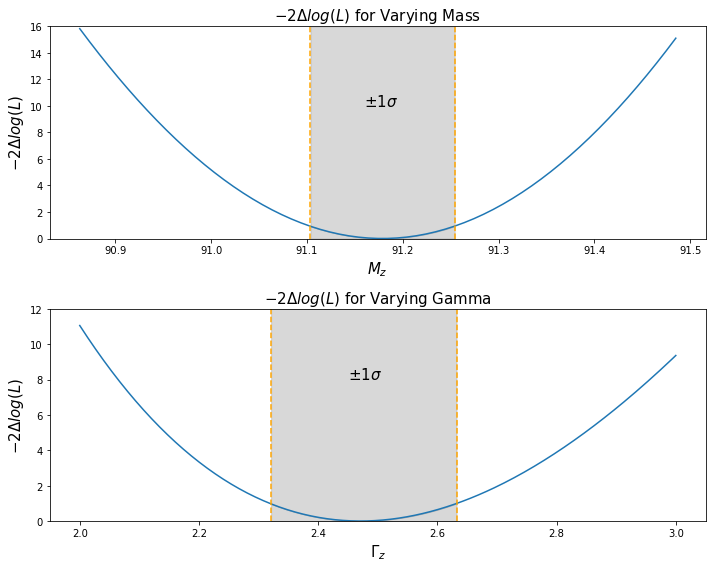

In [400]:
del_log_M = np.zeros(bins)
del_log_G = np.zeros(bins)
for i in range(bins):
    del_log_M[i] = del_logL[:,i].min()
    del_log_G[i] = del_logL[i,:].min()
    
masscut = (del_log_M < 1)
gammacut = (del_log_G < 1)

mass_sig1 = m0s[masscut]
gamma_sig1 = gams[gammacut]
m_lowersig = mass_sig1.min()
m_uppersig = mass_sig1.max()
gam_lowersig = gamma_sig1.min()
gam_uppersig = gamma_sig1.max() 

Mrangecond = del_log_M < 16
Grangecond = del_log_G < 16

print('Best Fit M = ' + str(round(bestfitpar[0],3)) + ' +/- ' + str(round(bestfitpar[0]-m_lowersig,3)))
print('Best Fit Gamma = ' + str(round(bestfitpar[1],3)) + ' +/- ' + str(round(bestfitpar[1]-gam_lowersig,3)))
print('--------------------')

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(m0s[Mrangecond], del_log_M[Mrangecond])
plt.axvline(m_lowersig,linestyle='--',color = 'orange')
plt.axvline(m_uppersig,linestyle='--',color = 'orange')
plt.fill_between(m0s[masscut], 0, del_log_M[masscut],color = 'gray',alpha = 0.3)
plt.fill_between(m0s[masscut], del_log_M[masscut], 16,color = 'gray',alpha = 0.3)
plt.xlabel('$M_{z}$',fontsize=15)
plt.ylabel('$-2\Delta log(L)$',fontsize=15)
plt.text(91.16,10,r'$\pm1\sigma$',fontsize=15)
plt.ylim(0,16)
plt.title('$-2\Delta log(L)$ for Varying Mass',fontsize=15)

plt.subplot(2,1,2)
plt.plot(gams[Grangecond], del_log_G[Grangecond])
plt.axvline(gam_lowersig,linestyle='--',color = 'orange')
plt.axvline(gam_uppersig,linestyle='--',color = 'orange')
plt.fill_between(gams[gammacut], 0, del_log_G[gammacut],color = 'gray',alpha = 0.3)
plt.fill_between(gams[gammacut], del_log_G[gammacut], 12,color = 'gray',alpha = 0.3)
plt.xlabel('$\Gamma_{z}$',fontsize=15)
plt.ylabel('$-2\Delta log(L)$',fontsize=15)
plt.text(2.45,8,r'$\pm1\sigma$',fontsize=15)
plt.ylim(0,12)
plt.title('$-2\Delta log(L)$ for Varying Gamma',fontsize=15)

plt.tight_layout()
plt.show()

___________________________________________________________________
Summary and Conclusions:

____________________________________________________________________